Implementation of the classic SIR model
====================


Equations and intuition
------------------------------------
Let S(t), I(t) and R(t) the ratio of persons susceptible, infected and recovered for the disease being modeled
We suppose that the population is constant, so we have that S(t)+I(t)+R(t) is constant equal to one. 

The equations are

$$
\dfrac{dS}{dt} = -rSI
$$

$$
\dfrac{dI}{dt} = rSI-aI
$$
$$
\dfrac{dR}{dt} = aI
$$


r and a are parameters called the infection rate and the removal rate of infectives

The first equation describes that the rate of change of the susceptible pool is proportional to the rate of susceptibles and the rate of infected, so we assume that the **rate of mixing beetween healthy and infected people is uniform**

The second equation describes that the rate of the change of the infected pool grows proportional to the rate of susceptibles and the rate of infected (**uniform mixing assumption again**) and decrease proportional to the number of infected people

The third equation describes that the people recovered grows proportional to the number of infected people

We can notice that $\dfrac{dS}{dt} + \dfrac{dI}{dt} + \dfrac{dR}{dt} = 0$, so we have that $S(t) + I(t) + R(t)$ is constant, so the population stays the same

Numerical solution
---------------------------

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline  

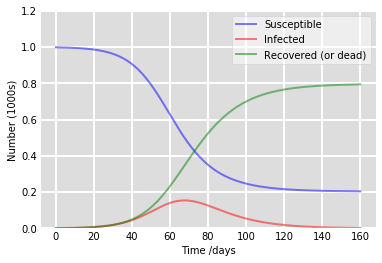

In [5]:

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1/10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered (or dead)')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()